In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import scipy as sp
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [ ]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'  # Ensures plots render correctly

In [ ]:
directory_name = 'BacterialPathogensData'

In [4]:
from utils import load_dataframe_from_csv
data_df = load_dataframe_from_csv(df_csv_name='data.csv', directory_name=directory_name)
data_df

,Genus,Species,CanonicalSpecies,PMID,Title,Abstract,PublicationYear,Authors,Journal,DOI,...,IsPathogen,ConfirmedPathogen,CausalEvidence,Summary,onehot_embedding,Disease,DiseaseType,AnonymisedAbstract,embedding,anonymised_embedding
0,Chryseobacterium,Chryseobacterium gleum,Chryseobacterium gleum,30782983,"Differences in Clinical Manifestations, Antimi...","Chryseobacterium infections are uncommon, and ...",2019,"Lin JN, Lai CH, Yang CH, Huang YH",Antimicrobial agents and chemotherapy,10.1128/AAC.02256-18,...,YES,YES,C. gleum was significantly more associated wit...,BACTERIUM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bacteremia,NaN,"Differences in Clinical Manifestations, Antimi...","[-0.007924087345600128, 0.006160513032227755, ...","[0.025693882256746292, -0.019028473645448685, ..."
1,Chryseobacterium,Chryseobacterium gleum,Chryseobacterium gleum,32850157,Multiple Drug-Resistant CLABSI from an Extreme...,Chryseobacterium gleum is a lactose nonferment...,2020,"Anson D, Chaucer B, Norton J, Bansal S",Case reports in infectious diseases,10.1155/2020/2097813,...,YES,YES,"We present the first reported case, to the bes...","CIRCULATORY SYSTEM, SYSTEMIC, STERILE SITE, NO...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",sepsis,NaN,Multiple Drug-Resistant CLABSI from an Extreme...,"[-0.011992748826742172, 0.00048700711340643466...","[-0.015018868260085583, -0.01588534191250801, ..."
2,Chryseobacterium,Chryseobacterium gleum,Chryseobacterium gleum,25865994,Pyonephrosis due to Chryseobacterium gleum: a ...,Chryseobacterium spp are widely distributed in...,2015,"Garg S, Appannanavar SB, Mohan B, Taneja N",Indian journal of medical microbiology,10.4103/0255-0857.154894,...,YES,YES,"Here, we report the first case of AmpC produci...",BACTERIUM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",pyonephrosis,urinary tract,Pyonephrosis due to bacterium_1: a first case ...,"[-0.002222219714894891, -0.035043925046920776,...","[0.012993763200938702, -0.054058171808719635, ..."
3,Chryseobacterium,Chryseobacterium gleum,Chryseobacterium gleum,28890506,Sepsis Due to Chryseobacterium gleum in a Diab...,NaN,2017,"Singhal L, Gupta V, Mehta V, Singla N, Janmeja...",Japanese journal of infectious diseases,10.7883/yoken.JJID.2016.567,...,YES,YES,This abstract does not contain a sentence that...,"DIABETES, RESPIRATORY SYSTEM, SYSTEMIC , BACT...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",sepsis,NaN,Sepsis Due to bacterium_1 in a Diabetic Patien...,"[0.002743937075138092, -0.01313463319092989, 0...","[0.015917854383587837, -0.02438432350754738, 0..."
4,Chryseobacterium,Chryseobacterium gleum,Chryseobacterium gleum,33898043,Chryseobacterium gleum bacteraemia: first repo...,Chryseobacterium gleum is a Gram-negative aero...,2021,"Ali M, Alsoub H",New microbes and new infections,10.1016/j.nmni.2021.100869,...,YES,YES,"It commonly colonizes mechanical devices, caus...","CIRCULATORY SYSTEM, RESPIRATORY SYSTEM, SYSTEM...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bacteraemia\npneumonia,respiratory,bacterium_1 bacteraemia: first reported cases ...,"[0.00397160928696394, 0.010238339193165302, 0....","[0.023630263283848763, -0.006429797969758511, ..."


In [5]:
from utils import load_dataframe_from_csv
hierarchy_df = load_dataframe_from_csv(df_csv_name='hierarchy.csv', directory_name='')
data_df = pd.merge(hierarchy_df, data_df, left_on='species', right_on='CanonicalSpecies', how='right')

In [7]:
counts_df = load_dataframe_from_csv(df_csv_name='counts.csv', directory_name=directory_name)
counts_df

,Genus,CanonicalSpecies,n_causation,n_articles,n_sampled,pathogenic_index
0,Abiotrophia,Abiotrophia defectiva,6,6,6,0.160939
1,Acetobacter,Acetobacter indonesiensis,1,3,3,0.000000
2,Acetobacter,Acetobacter tropicalis,1,2,2,0.000000
3,Achromobacter,Achromobacter animicus,1,2,2,0.000000
4,Achromobacter,Achromobacter denitrificans,75,36,36,0.387804
5,Achromobacter,Achromobacter insolitus,1,5,5,0.000000
6,Achromobacter,Achromobacter marplatensis,1,4,4,0.000000
7,Achromobacter,Achromobacter mucicolens,2,7,7,0.062260
8,Achromobacter,Achromobacter piechaudii,4,7,7,0.124519
9,Achromobacter,Achromobacter ruhlandii,1,21,21,0.000000


In [8]:
from utils import format_data_dict, extract_nested_dict
concepts_string, keys_string = format_data_dict(extract_nested_dict(pd.read_excel(directory_name+'/YES_NO_questions.xlsx', header=None)))
unique_classes = keys_string.split(', ')+['BACTERIUM']
print('#concepts: %d'%(len(unique_classes)) )
print('Concepts:')
print(', '.join(unique_classes))

#concepts: 79
Concepts:
DIABETES, CYSTIC FIBROSIS, IMMUNOSUPPRESSIVE TREATMENT, IMMUNOCOMPROMISED, SMOKING, ALCOHOL, OBESITY, OLDER PEOPLE, CHILDREN AND ADOLESCENTS, INFANTS, PREGNANCY, DRUGS, NERVOUS SYSTEM, VISUAL SYSTEM, EAR, CIRCULATORY SYSTEM, RESPIRATORY SYSTEM, DIGESTIVE SYSTEM, SKIN, MUSCULOSKELETAL, GENITOURINARY, SYSTEMIC, STERILE SITE, OPPORTUNISTIC, POLYMICROBIAL, NOSOCOMIAL, OPERATION, DEVICE ASSOCIATED, CATHETER, INTUBATION, CANNULA ASSOCIATED, OINTMENT, MULTIDRUG RESISTANCE, BIOFILM, ANAEROBIC, SPOREFORMING, ASYMPTOMATIC CARRIAGE, TAXONOMY, TOXINS, SEXUALLY TRANSMITTED, FOODBORNE, WATERBORNE, AIRBORNE, FECAL ORAL, FOMITE, BITE, WOUND, VECTORBORNE, ZOONOSIS, DIRECT CONTACT, VERTICAL, OCCUPATIONAL, RECREATION, PETS, DOMESTICATED ANIMALS, REPTILES, AQUATIC VERTEBRATES, BIRDS, WILD MAMMALS, INVERTEBRATES, SOIL, PLANTS, MARINE, FRESHWATER, AIR, SEWAGE, TEMPERATURE, PRECIPITATION, OUTBREAKS, PRIORITY SPECIES, VACCINE, ENDEMICITY, SURVEILLANCE, STRAINS, MICROBIOME, MICROBIAL GE

In [9]:
from draw_graph_linear_assignment import fast_visualisation
fast_visualisation(
    data_df, 
    counts_df,
    desired_attributes_for_embedding=None, 
    column_group_by='CanonicalSpecies', 
    column_embedding='anonymised_embedding', 
    unique_classes=unique_classes,
    min_num_to_show=3,
    filename='fig3_overview.pdf',
    figure_size=1000,
    show_legend=False)

In [10]:
from draw_graph_linear_assignment import fast_visualisation
fig = fast_visualisation(
    data_df, 
    counts_df,
    hierarchy_df=hierarchy_df,
    desired_attributes_for_embedding=None, 
    column_group_by='CanonicalSpecies', 
    column_embedding='anonymised_embedding', 
    column_color_by='phylum',
    unique_classes=unique_classes,
    min_num_to_show=3,
    filename='fig3_phylum.pdf',
    highlight_elements=['Rothia dentocariosa','Mycobacterium tuberculosis','Nocardia brasiliensis'],
    figure_size=1000,
    show_legend=False)

In [11]:
fast_visualisation(
    data_df, 
    counts_df,
    desired_attributes_for_embedding=None, 
    desired_attributes_for_color = ["ZOONOSIS"],
    column_group_by='CanonicalSpecies', 
    column_embedding='anonymised_embedding', 
    unique_classes=unique_classes,
    min_num_to_show=3,
    use_linear_contrast=True, 
    x_ref=5, 
    z_ref=30,
    cmap='hot_r',
    filename='fig3D_ZOONOSIS.pdf',
    highlight_elements=['Chlamydia psittaci','Chlamydia trachomatis'],
    figure_size=1000,
    show_legend=False)

In [12]:
fast_visualisation(
    data_df, 
    counts_df,
    desired_attributes_for_embedding=None, 
    desired_attributes_for_color = ["SEXUALLY TRANSMITTED"],
    column_group_by='CanonicalSpecies', 
    column_embedding='anonymised_embedding', 
    unique_classes=unique_classes,
    min_num_to_show=3,
    use_linear_contrast=True, 
    x_ref=5, 
    z_ref=30,
    cmap='hot_r',
    filename='fig3C_STD.pdf',
    highlight_elements=['Neisseria gonorrhoeae','Treponema pallidum', 'Shigella boydii', 'Klebsiella granulomatis' ],
    figure_size=1000,
    show_legend=False)

In [13]:
from draw_graph_linear_assignment import fast_visualisation
clustering_df = fast_visualisation(
    data_df, 
    counts_df,
    desired_attributes_for_embedding=None, 
    column_group_by='CanonicalSpecies', 
    column_embedding='anonymised_embedding', 
    unique_classes=unique_classes,
    min_num_to_show=12,
    n_clusters=75,
    contamination=1e-6,
    filename='fig5_pathogen_types.pdf',
    figure_size=1000,
    show_legend=False)

---

Selected data contains: 
#genera: 9
#species: 238


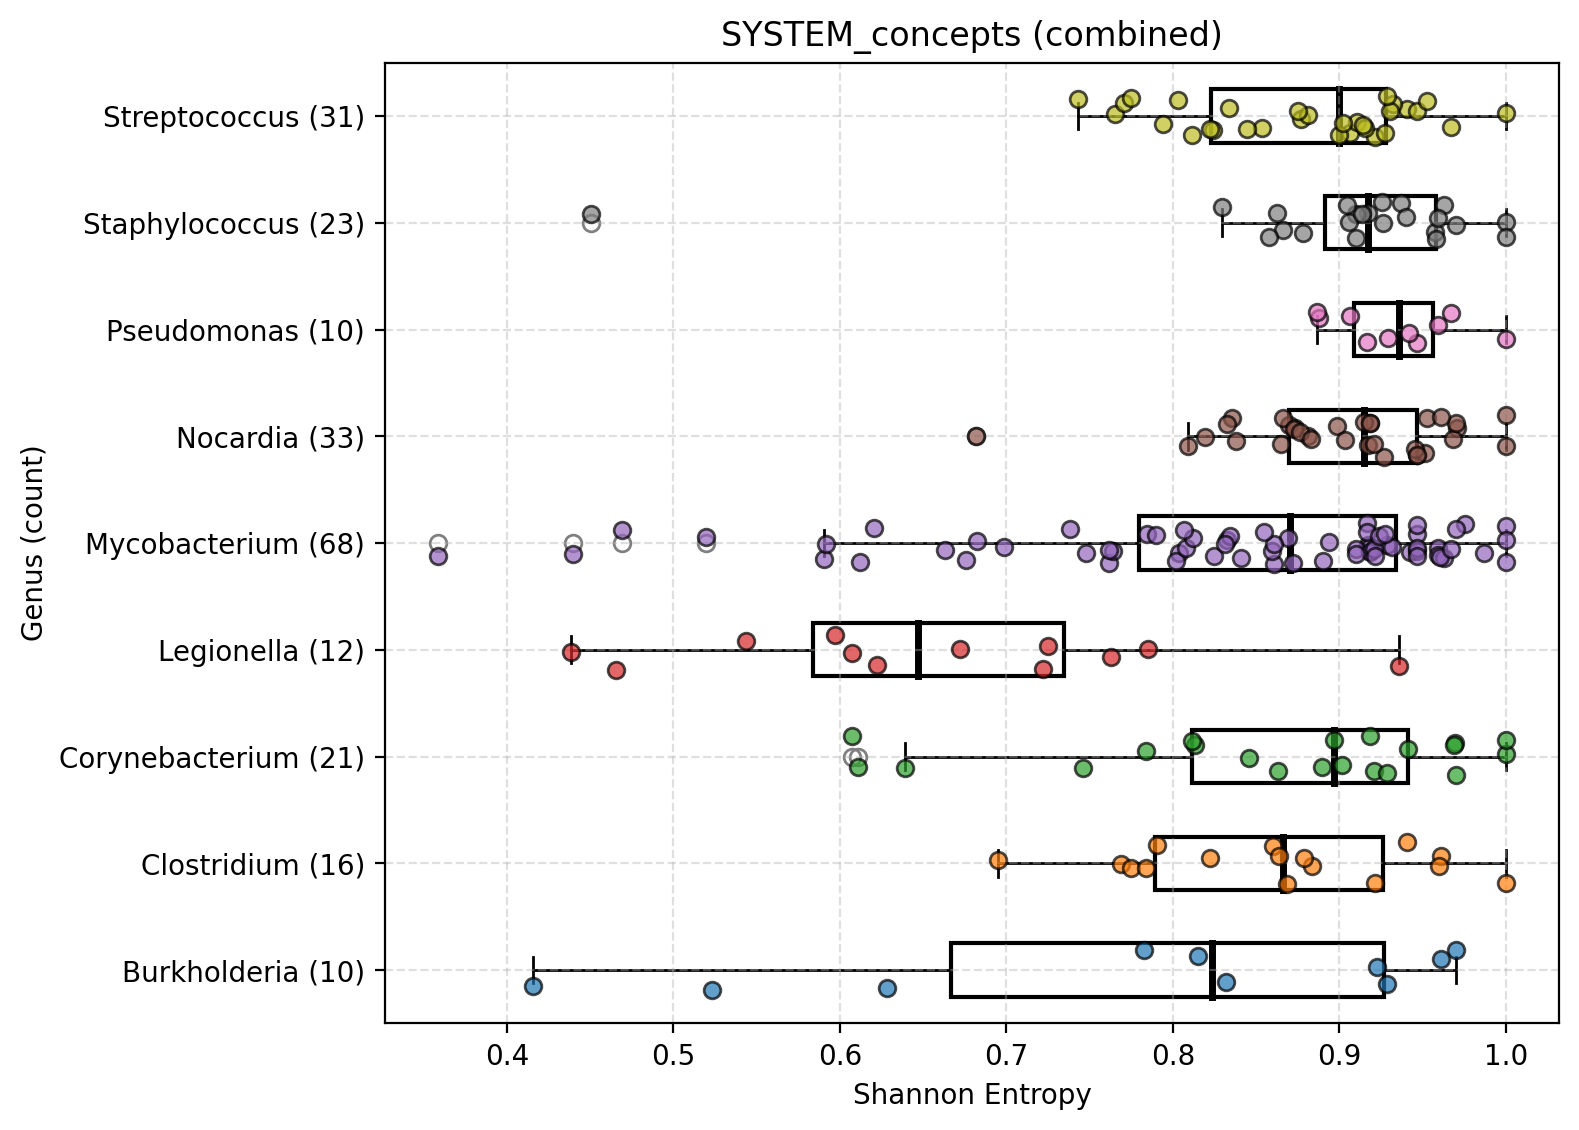

In [14]:
min_num_causation = 3
selected_counts_df = counts_df[counts_df['n_causation'] >= min_num_causation]

selected_genera_list = ['Mycobacterium', 'Corynebacterium', 'Nocardia', 'Streptococcus', 'Staphylococcus', 'Clostridium', 'Burkholderia', 'Pseudomonas', 'Legionella']
selected_counts_df = selected_counts_df[selected_counts_df['Genus'].isin(selected_genera_list)]

selected_species_list = selected_counts_df['CanonicalSpecies'].values.tolist()
selected_data_df = data_df[data_df['CanonicalSpecies'].isin(selected_species_list)]

print('Selected data contains: ')
print('#genera: %d'%len(set(selected_data_df['Genus'].values.tolist())))
print('#species: %d'%len(set(selected_data_df['species'].values.tolist())))

data_hot_df = selected_data_df.loc[:,['CanonicalSpecies','onehot_embedding']]
averaged_embeddings = data_hot_df.groupby('CanonicalSpecies')['onehot_embedding'].agg(lambda x: np.mean(np.stack(x), axis=0))

from draw_graph_linear_assignment import compute_entropy_distribution_by_genus
compute_entropy_distribution_by_genus(
    data_series=averaged_embeddings,
    axis_labels=unique_classes,
    selected_names=selected_species_list, 
    selected_axis_names=SYSTEM_concepts,
    title='SYSTEM_concepts',
    combined_plot=True,
    scale=0.8,
    filename='fig4_entropy.pdf'
)

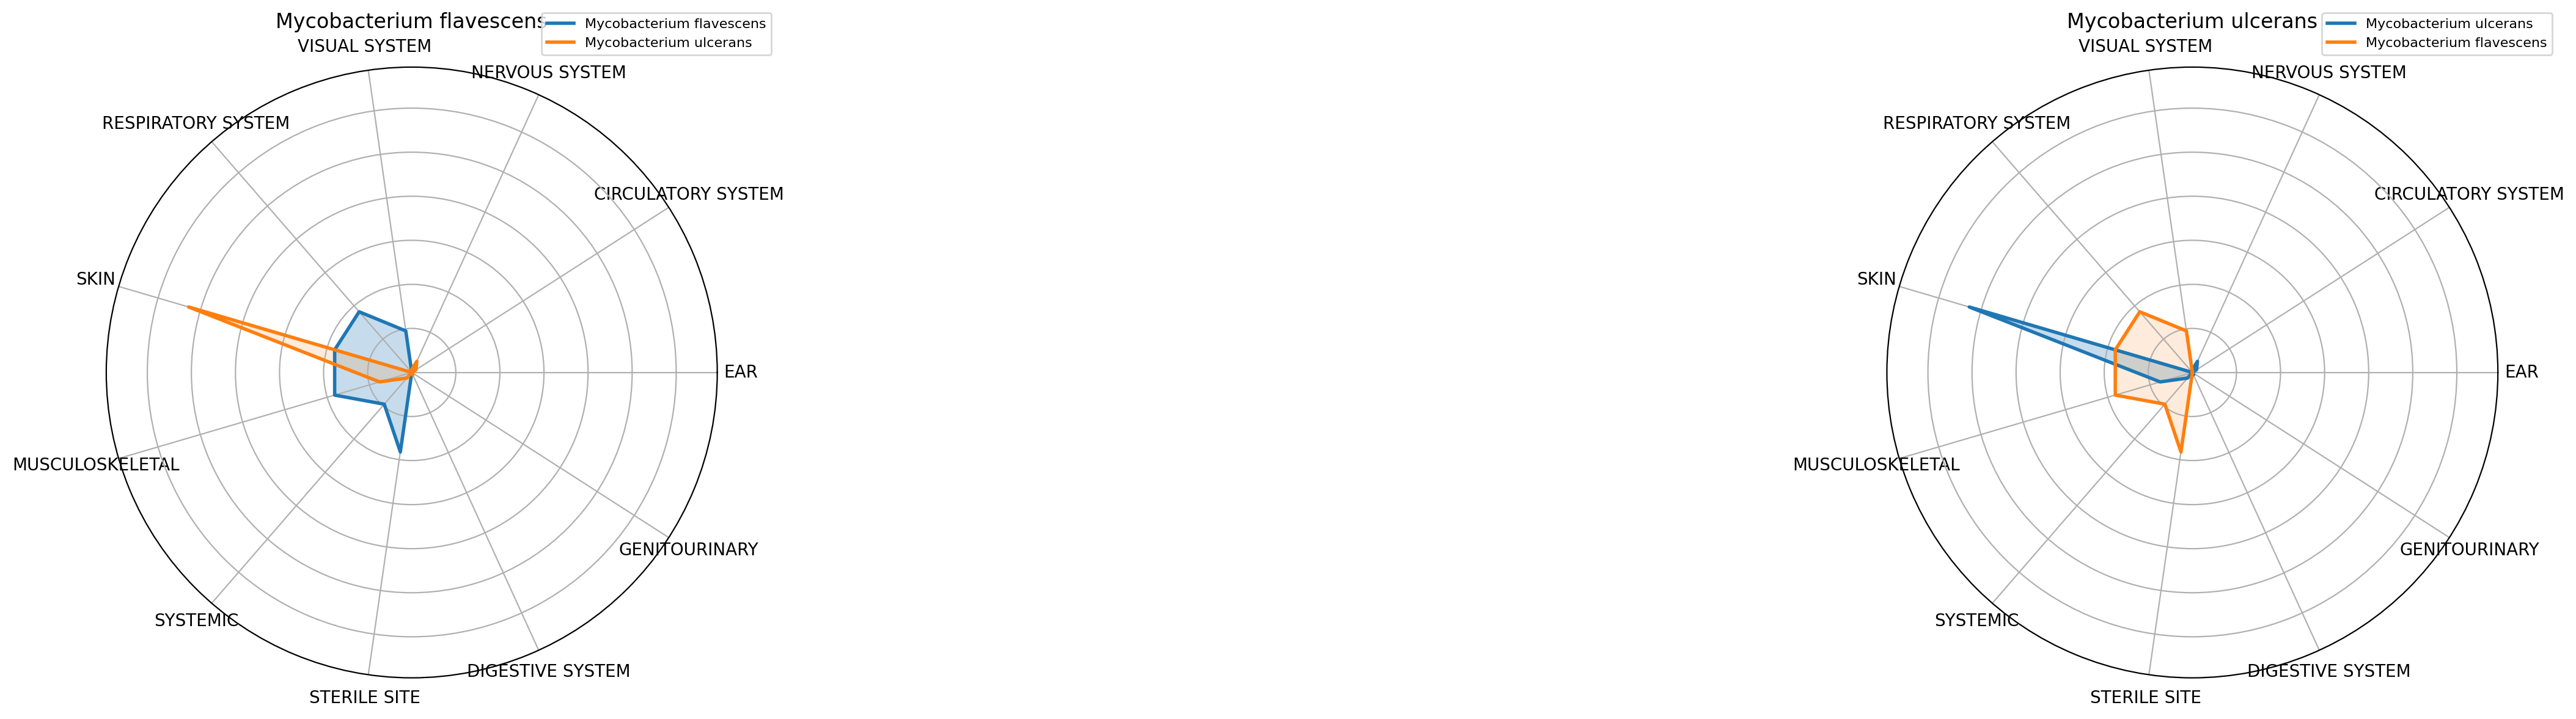

In [15]:
selected_axis_names = ["EAR", "CIRCULATORY SYSTEM", "NERVOUS SYSTEM", "VISUAL SYSTEM", "RESPIRATORY SYSTEM", "SKIN", "MUSCULOSKELETAL", "SYSTEMIC", "STERILE SITE", "DIGESTIVE SYSTEM", "GENITOURINARY"]
selected_species_list = ['Mycobacterium flavescens','Mycobacterium ulcerans']
selected_data_df = data_df[data_df['CanonicalSpecies'].isin(selected_species_list)]
data_hot_df = selected_data_df.loc[:,['CanonicalSpecies','onehot_embedding']]
averaged_embeddings = data_hot_df.groupby('CanonicalSpecies')['onehot_embedding'].agg(lambda x: np.mean(np.stack(x), axis=0))
selected_names = selected_species_list
comparative_selected_names = selected_names[1:]+selected_names[0:1]

from draw_graph_linear_assignment import plot_radar_from_series
plot_radar_from_series(
    averaged_embeddings, 
    selected_names=selected_names, 
    axis_labels=unique_classes, 
    selected_axis_names=selected_axis_names, 
    comparative_selected_names=comparative_selected_names, 
    num_per_row=6, 
    size=6,
    fix_axis_range=True,     # fix axes to [0, 1]
    log_scale=True,           # apply log(value + 1)
    filename='fig4B_radar.pdf'
)

In [16]:
from draw_graph_linear_assignment import plot_tsne_with_ellipses
genera = ['Neisseria']
species_list = set(data_df[data_df['Genus'].isin(genera)]['CanonicalSpecies'].values)
local_df = data_df[data_df['CanonicalSpecies'].isin(species_list)]

kwargs = dict(
    color_col='CanonicalSpecies', 
    confidence=15,
    n_std=2, 
    min_n_instances=8,
    plot_width=1000, 
    plot_height=1000,
    ellipse_darken_factor=0.95,
)
embedding_column = 'anonymised_embedding'
show_scatter=True
fig = plot_tsne_with_ellipses(
    local_df, 
    coordinate_col=embedding_column, 
    show_scatter=show_scatter,
    **kwargs)
fig.show()

In [26]:
from draw_graph_linear_assignment import plot_tsne_with_ellipses

def generate_all_plots(genera_list):
    genera = '-'.join(genera_list)
    species_list = set(data_df[data_df['Genus'].isin(genera_list)]['CanonicalSpecies'].values)
    local_df = data_df[data_df['CanonicalSpecies'].isin(species_list)]

    kwargs = dict(
        color_col='CanonicalSpecies', 
        confidence=15,
        n_std=2, 
        min_n_instances=8,
        plot_width=1000, 
        plot_height=1000,
        ellipse_darken_factor=0.95,
    )

    for embedding_column in ['onehot_embedding','embedding','anonymised_embedding']:
        for show_scatter in [True, False]:
            title=f"Species:{genera} with embedding:{embedding_column} [with points:{show_scatter}]"

            fig = plot_tsne_with_ellipses(
                local_df, 
                coordinate_col=embedding_column, 
                title=title,
                show_scatter=show_scatter,
                **kwargs)
            
genera_list = ['Neisseria', 'Klebsiella', 'Corynebacterium', 'Campylobacter', 'Yersinia', 'Burkholderia']
generate_all_plots(genera_list)

---